In [1]:
import yfinance as yf

import matplotlib.pyplot as plt

import numpy as np 

In [3]:
%matplotlib inline 

In [5]:
stock = ['PFE']
stock_df = yf.download(stock, start='2020-03-01',end='2020-07-31',progress=False)

In [6]:
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,32.172676,33.159393,31.736242,33.092979,27.407417,42034469
2020-03-03,33.377609,33.946869,32.125237,32.542694,26.951668,46174475
2020-03-04,33.301708,34.592030,33.159393,34.535103,28.601772,38712155
2020-03-05,33.823528,34.326378,33.358635,33.643265,27.863155,35096303
2020-03-06,32.922199,33.368122,32.371918,33.225807,27.517424,40931036
...,...,...,...,...,...,...
2020-07-24,36.081593,36.195446,35.417458,35.730549,29.886745,33870501
2020-07-27,35.445919,35.815941,35.322582,35.616699,29.791510,27640307
2020-07-28,36.565464,37.324478,36.110058,37.020874,30.966030,56393954


In [8]:
# %% define a function for 
# arithmetically decreasing weights

def getArithmWeights(q):
    arithmetic_range = np.arange(1,q+1)

    weights = arithmetic_range/arithmetic_range.sum()

    return weights


In [9]:
weights = getArithmWeights(q=10)
stock_df['WMA'] = stock_df.Close.rolling(10).apply(lambda x : np.sum(weights*x)).shift(1)

In [10]:
weights

array([0.01818182, 0.03636364, 0.05454545, 0.07272727, 0.09090909,
       0.10909091, 0.12727273, 0.14545455, 0.16363636, 0.18181818])

In [11]:
stock_df

,Open,High,Low,Close,Adj Close,Volume,WMA
Date,,,,,,,
2020-03-02,32.172676,33.159393,31.736242,33.092979,27.407417,42034469,NaN
2020-03-03,33.377609,33.946869,32.125237,32.542694,26.951668,46174475,NaN
2020-03-04,33.301708,34.592030,33.159393,34.535103,28.601772,38712155,NaN
2020-03-05,33.823528,34.326378,33.358635,33.643265,27.863155,35096303,NaN
2020-03-06,32.922199,33.368122,32.371918,33.225807,27.517424,40931036,NaN
...,...,...,...,...,...,...,...
2020-07-24,36.081593,36.195446,35.417458,35.730549,29.886745,33870501,34.991892
2020-07-27,35.445919,35.815941,35.322582,35.616699,29.791510,27640307,35.243746
2020-07-28,36.565464,37.324478,36.110058,37.020874,30.966030,56393954,35.408832


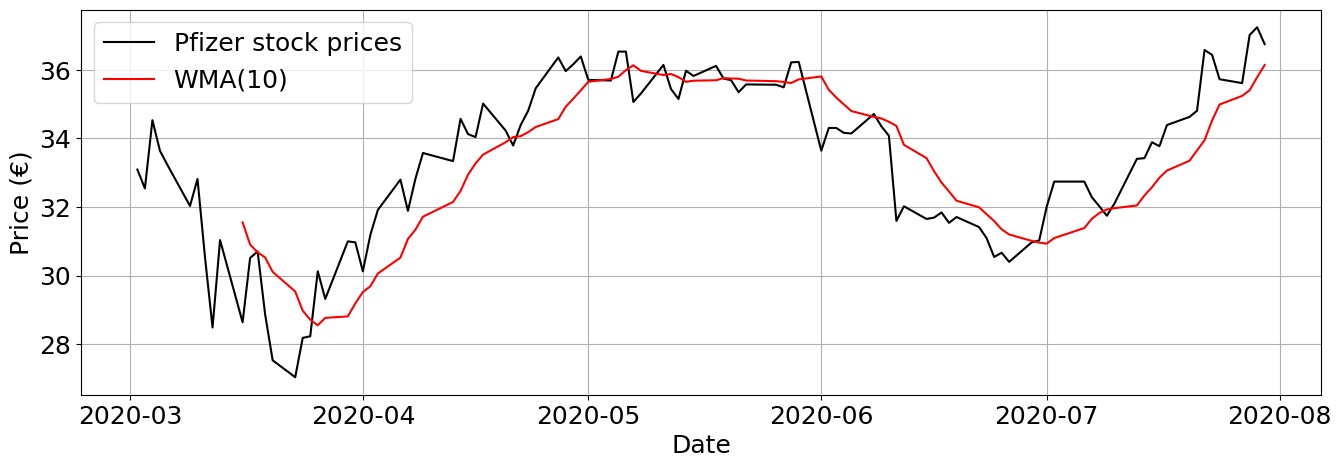

In [13]:
plt.rcParams.update({'font.size' : 18})

plt.figure(figsize=(16,5), dpi=100)

plt.plot(stock_df.index, stock_df.Close, color ='k')

plt.plot(stock_df.index, stock_df['WMA'], color = 'red')

plt.gca().set(xlabel = 'Date', ylabel = 'Price (€)')
plt.legend(labels=['Pfizer stock prices', 'WMA(10)'])
plt.grid()
plt.show()